In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from datasets import GrayscaleImageFolder
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor
from torchvision.utils import make_grid

experiment_name = '128_all_run2'
test_generator_path = f'D:/GitRepos/DL8TQ2_KepalkotoDiagnosztikaBeadando/runs/{experiment_name}/generator_last.pt'
noise_vector_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

generator = torch.jit.load(test_generator_path)

In [2]:
sample_size = 64
image_size = 128

transforms = Compose([
    Resize(image_size),
    CenterCrop(image_size),
    ToTensor()
])

dataset = GrayscaleImageFolder(root="D:/Data/Lung/images/RawExports/",
                               transform=transforms)

dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=sample_size,
                                         shuffle=True)

real_batch = next(iter(dataloader))

with torch.inference_mode():
    fixed_noise = torch.randn(sample_size, noise_vector_size, 1, 1, device=device)
    fake_batch = (generator(fixed_noise).detach().to(torch.device('cpu')))

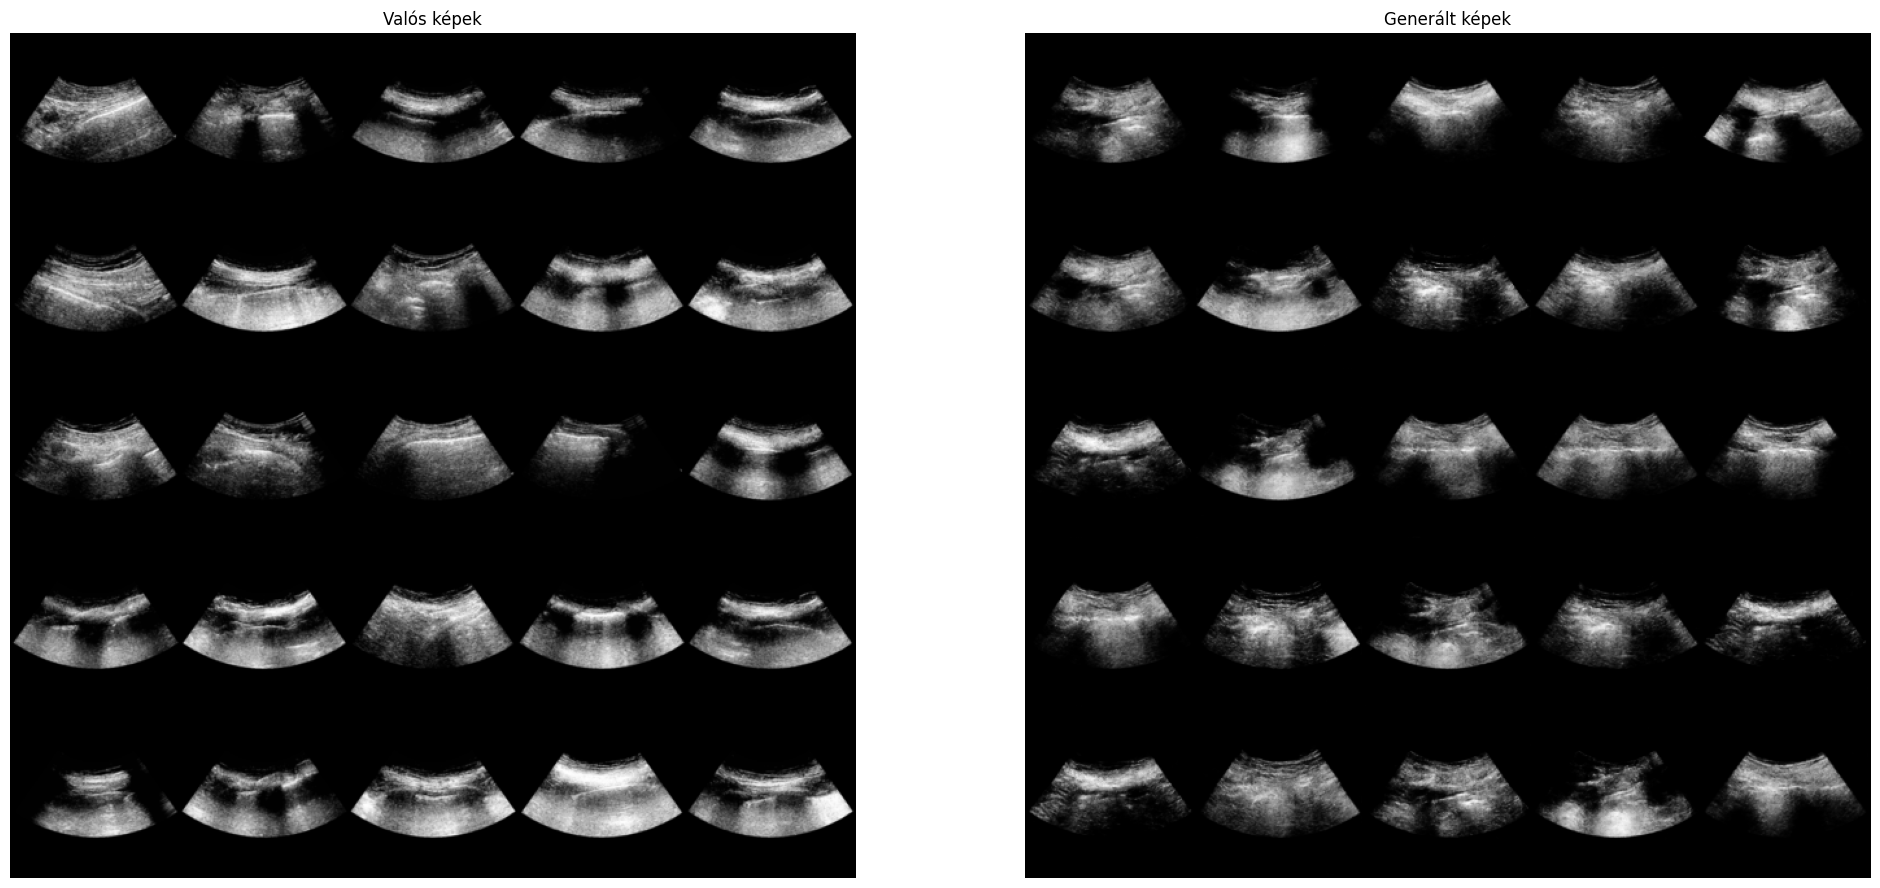

In [4]:
plt.figure(figsize=(24,24))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Valós képek")
plt.imshow(np.transpose(make_grid(real_batch.to(device)[1:26], padding=2, normalize=True, nrow=5).cpu(),(1,2,0)), cmap='gray')

plt.subplot(1,2,2)
plt.axis("off")
plt.title("Generált képek")
plt.imshow(np.transpose(make_grid(fake_batch.to(device)[1:26], padding=2, normalize=True, nrow=5).cpu(),(1,2,0)), cmap='gray')
plt.show()